In [54]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df_tmdb = pd.read_csv("../../data/tmdb.movies.csv.gz")

df_tmdb
df_tmdb.head()


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [56]:
df_tn = pd.read_csv("../../data/tn.movie_budgets.csv.gz")
df_tn
df_tn.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [57]:
df_bom = pd.read_csv("../../data/bom.movie_gross.csv.gz")
df_bom
df_bom.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [58]:
df_info = pd.read_csv("../../data/rt.movie_info.tsv.gz", sep='\t')
df_info
df_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [59]:
df_reviews = pd.read_csv("../../data/rt.reviews.tsv.gz", sep='\t', engine = 'python')
df_reviews
df_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [60]:
conn = sqlite3.connect('../../data/im.db')

df = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)

In [61]:
df.head()

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings


In [62]:
conn = sqlite3.connect('data.sqlite')

In [63]:
conn = sqlite3.connect('../../data/im.db')

df = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)

In [64]:
joined_tables_df = pd.read_sql("""SELECT *
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating
ORDER BY runtime_minutes DESC
;
""", conn)

In [65]:
joined_tables_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0808447,The Last Pogo Jumps Again,The Last Pogo Jumps Again,2013,200.0,"Documentary,Music",9.3,42
1,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
3,tt0464162,Komaram Puli,Komaram Puli,2010,163.0,"Action,Crime,Thriller",3.8,1423
4,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584


In [72]:
# split the genres and added a space in order to use the explode function
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") 
genres_split_df=joined_tables_df.explode('genres')

In [110]:
joined_tables_df.head()

,runtime_minutes,averagerating,genres
0,200.0,9.3,"[Documentary, Music]"
1,180.0,7.6,[Documentary]
2,175.0,7.0,"[Action, Crime, Drama]"
3,163.0,3.8,"[Action, Crime, Thriller]"
4,160.0,7.8,"[Animation, Drama, History]"


In [111]:
joined_tables_df.describe()

,runtime_minutes,averagerating
count,81.000000,91.000000
mean,99.530864,5.500000
std,28.236097,2.641338
min,45.000000,1.000000
25%,85.000000,3.250000
50%,95.000000,5.500000
75%,109.000000,7.750000
max,200.000000,10.000000


<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

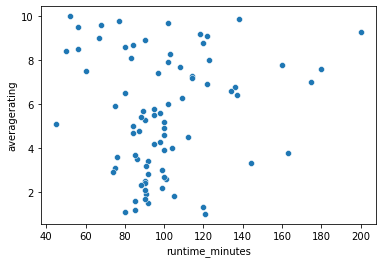

In [109]:
import seaborn as sns
sns.scatterplot(data=joined_tables_df, x="runtime_minutes", y="averagerating")

In [75]:
joined_tables_df = pd.read_sql("""SELECT runtime_minutes, averagerating
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating
ORDER BY runtime_minutes DESC
;
""", conn)

<AxesSubplot:>

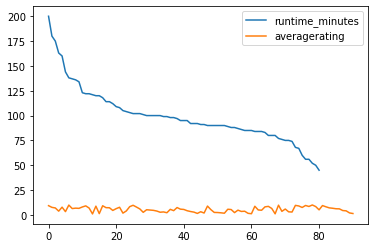

In [76]:
joined_tables_df.plot()

In [78]:
joined_tables_df.head()

,runtime_minutes,averagerating
0,200.0,9.3
1,180.0,7.6
2,175.0,7.0
3,163.0,3.8
4,160.0,7.8


In [79]:
joined_tables_df.describe()

,runtime_minutes,averagerating
count,81.000000,91.000000
mean,99.530864,5.500000
std,28.236097,2.641338
min,45.000000,1.000000
25%,85.000000,3.250000
50%,95.000000,5.500000
75%,109.000000,7.750000
max,200.000000,10.000000


In [80]:
poorly_rated_movies = joined_tables_df[joined_tables_df['averagerating'] <= 3]
poorly_rated_movies

,runtime_minutes,averagerating
13,121.0,1.0
15,120.0,1.3
22,105.0,1.8
28,101.0,2.6
33,100.0,2.7
34,99.0,3.0
35,99.0,2.2
43,92.0,2.8
44,92.0,1.5
46,91.0,1.9


In [81]:
poorly_rated_movies.describe()

,runtime_minutes,averagerating
count,19.000000,21.000000
mean,94.315789,2.000000
std,11.865228,0.620484
min,74.000000,1.000000
25%,89.000000,1.500000
50%,91.000000,2.000000
75%,99.500000,2.500000
max,121.000000,3.000000


In [82]:
highly_rated_movies = joined_tables_df[joined_tables_df['averagerating'] >= 7]
highly_rated_movies

,runtime_minutes,averagerating
0,200.0,9.3
1,180.0,7.6
2,175.0,7.0
4,160.0,7.8
6,138.0,9.9
10,123.0,8.0
11,122.0,9.1
14,120.0,8.8
16,118.0,9.2
17,114.0,7.3


In [83]:
highly_rated_movies.describe()

,runtime_minutes,averagerating
count,28.000000,31.000000
mean,103.535714,8.500000
std,39.861317,0.909212
min,50.000000,7.000000
25%,74.750000,7.750000
50%,102.000000,8.500000
75%,120.500000,9.250000
max,200.000000,10.000000


In [94]:
short_movies = joined_tables_df[joined_tables_df['runtime_minutes'] < 80]
short_movies

,runtime_minutes,averagerating,runtime_bin
68,77.0,9.8,60-89
69,76.0,3.6,60-89
70,75.0,5.9,60-89
71,75.0,3.1,60-89
72,74.0,2.9,60-89
73,68.0,9.6,60-89
74,67.0,9.0,60-89
75,60.0,7.5,<60
76,56.0,9.5,<60
77,56.0,8.5,<60


In [95]:
short_movies.describe()

,runtime_minutes,averagerating
count,13.000000,13.000000
mean,63.923077,7.146154
std,11.272840,2.683783
min,45.000000,2.900000
25%,56.000000,5.100000
50%,67.000000,8.400000
75%,75.000000,9.500000
max,77.000000,10.000000


In [86]:
long_movies = joined_tables_df[joined_tables_df['runtime_minutes'] > 120]

long_movies

,runtime_minutes,averagerating
0,200.0,9.3
1,180.0,7.6
2,175.0,7.0
3,163.0,3.8
4,160.0,7.8
5,144.0,3.3
6,138.0,9.9
7,137.0,6.4
8,136.0,6.8
9,134.0,6.6


In [87]:
long_movies.describe()

,runtime_minutes,averagerating
count,14.000000,14.000000
mean,146.785714,6.678571
std,24.943563,2.467692
min,121.000000,1.000000
25%,125.750000,6.450000
50%,137.500000,6.950000
75%,162.250000,7.950000
max,200.000000,9.900000


In [88]:
bins = [0, 60, 90, 120, 150, float('inf')]  # Custom bins for runtime ranges
labels = ['<60', '60-89', '90-119', '120-149', '150+']
joined_tables_df['runtime_bin'] = pd.cut(joined_tables_df['runtime_minutes'], bins=bins, labels=labels)
average_rating_by_runtime_bin = joined_tables_df.groupby('runtime_bin')['averagerating'].mean()

 

print(average_rating_by_runtime_bin)

runtime_bin
<60        8.166667
60-89      4.917857
90-119     4.990909
120-149    6.444444
150+       7.100000
Name: averagerating, dtype: float64


<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

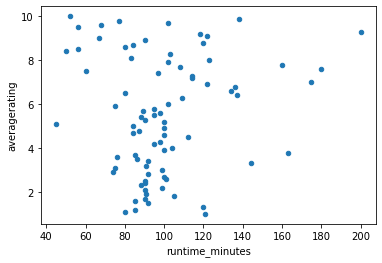

In [89]:
joined_tables_df.plot.scatter(x = 'runtime_minutes', y = 'averagerating')

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

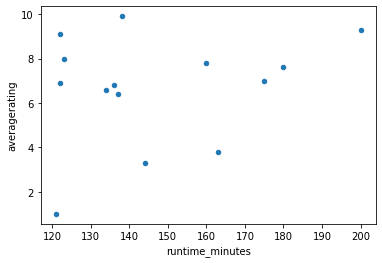

In [90]:
long_movies.plot.scatter(x = 'runtime_minutes', y = 'averagerating')


<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

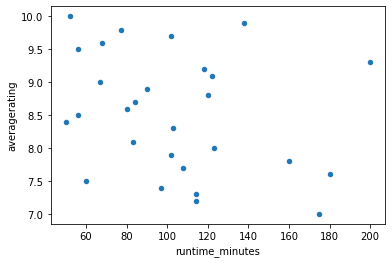

In [91]:
highly_rated_movies.plot.scatter(x = 'runtime_minutes', y = 'averagerating')


<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

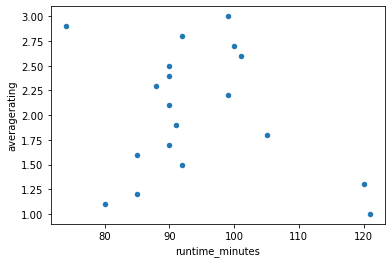

In [92]:
poorly_rated_movies.plot.scatter(x = 'runtime_minutes', y = 'averagerating')

<AxesSubplot:xlabel='runtime_minutes', ylabel='averagerating'>

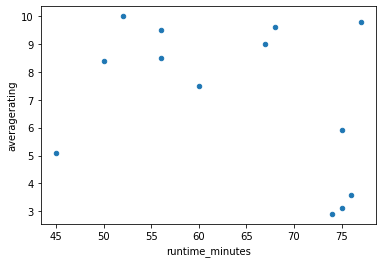

In [96]:
short_movies.plot.scatter(x = 'runtime_minutes', y = 'averagerating')

In [97]:
type(joined_tables_df)

pandas.core.frame.DataFrame

In [140]:
conn = sqlite3.connect('../../data/im.db')

df = pd.read_sql("""SELECT name FROM sqlite_master;""", conn)

In [141]:
joined_tables_df = pd.read_sql("""SELECT runtime_minutes, averagerating, genres
FROM movie_basics
JOIN movie_ratings
    USING(movie_id)
GROUP BY averagerating
ORDER BY runtime_minutes DESC
;
""", conn)

In [142]:
# split the genres and added a space in order to use the explode function
joined_tables_df['genres'] = joined_tables_df['genres'].str.split(",") 
genres_split_df=joined_tables_df.explode('genres')

In [133]:
genres_split_df.head(10)

,runtime_minutes,averagerating,genres
0,200.0,9.3,Documentary
0,200.0,9.3,Music
1,180.0,7.6,Documentary
2,175.0,7.0,Action
2,175.0,7.0,Crime
2,175.0,7.0,Drama
3,163.0,3.8,Action
3,163.0,3.8,Crime
3,163.0,3.8,Thriller
4,160.0,7.8,Animation


In [143]:
documentaries = genres_split_df[genres_split_df["genres"] == "Documentary"]

In [144]:
documentaries

,runtime_minutes,averagerating,genres
0,200.0,9.3,Documentary
1,180.0,7.6,Documentary
11,122.0,9.1,Documentary
25,102.0,9.7,Documentary
61,84.0,8.7,Documentary
68,77.0,9.8,Documentary
73,68.0,9.6,Documentary
74,67.0,9.0,Documentary
75,60.0,7.5,Documentary
76,56.0,9.5,Documentary


In [150]:
documentaries.describe()

,runtime_minutes,averagerating
count,12.000000,13.000000
mean,93.666667,9.053846
std,49.617323,0.791218
min,52.000000,7.500000
25%,59.000000,8.700000
50%,72.500000,9.300000
75%,107.000000,9.600000
max,200.000000,10.000000


In [149]:
import seaborn as sns
sns.scatterplot(data=documentaries, x="runtime_minutes", y="averagerating", hue="genres", style="documentaries")

ValueError: Could not interpret value `documentaries` for parameter `style`